In [1]:
%matplotlib inline

In [2]:
import os
from pathlib import Path

In [3]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

In [4]:
path = Path.home() / 'data' / 'camera_digits'
os.listdir(path)

['digits2.JPG', 'digits1.JPG']

In [5]:
def show(image, figsize=(12, 8)):
    f, ax = plt.subplots(1, 1, figsize=figsize)
    ax.axis('off')
    cmap = 'gray' if len(image.shape) == 2 else None
    ax.imshow(image, cmap=cmap)
    return ax

In [6]:
image = cv.imread(str(path / 'digits1.JPG'))

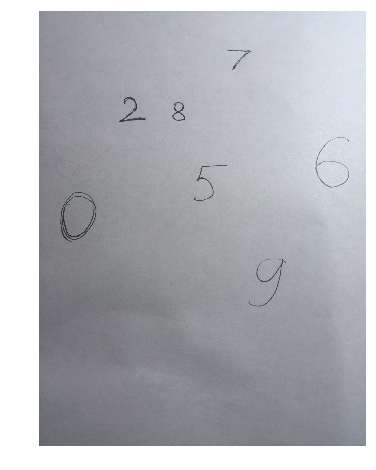

In [7]:
show(image)

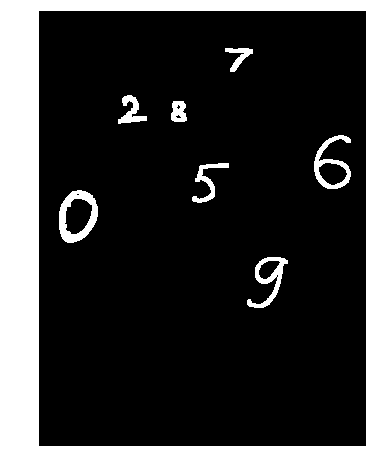

In [8]:
grayscale = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
binary = cv.adaptiveThreshold(grayscale, 255, cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY_INV, 7, 10)
kernel = cv.getStructuringElement(cv.MORPH_RECT, (3, 3))
# dilated = cv.dilate(binary, kernel, iterations=4)
# show(dilated)
transformed = cv.dilate(binary, kernel, iterations=2)
transformed = cv.morphologyEx(transformed, cv.MORPH_OPEN, kernel, iterations=3)
transformed = cv.dilate(transformed, kernel, iterations=10)
h, w = transformed.shape[:2]
mask = np.zeros((h + 2, w + 2), np.uint8)
show(transformed)
# filled = transformed.copy()
# cv.floodFill(filled, mask, (0, 0), 255)
# filled = cv.bitwise_not(filled)
# show(filled)

In [15]:
params = cv.SimpleBlobDetector_Params()
params.filterByArea = True
params.filterByInertia = False
params.filterByConvexity = False
params.minThreshold = 0
params.maxThreshold = 255

detector = cv.SimpleBlobDetector_create(params)
keypoints = detector.detect(transformed)

In [16]:
for k in keypoints:
    print(k.pt)

(292.7173767089844, 1375.677490234375)
(673.1405639648438, 801.6546020507812)
(1045.2801513671875, 793.0992431640625)
(1045.6820068359375, 720.7606811523438)


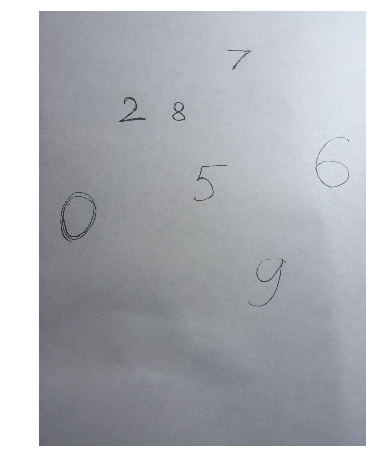

In [19]:
output = image.copy()
cv.drawKeypoints(image, keypoints, output)
show(output)